In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
import ppscore as pps
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
import statsmodels.formula.api as smf
import warnings
from xgboost import XGBRegressor

warnings.filterwarnings('ignore')
sns.set_style("whitegrid", {"grid.linestyle": "-"})
custom_palette = ["#99e6b3", "#7fffd4", "#66cdaa", "#00ffff", "#29ab87"]
palette1 = ["#000000", "#696969", "#E6E6FA", "#008080", "#FF7F50"]
palette2 = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F"]

In [3]:
df=pd.read_csv(r"D:\Fuel_Consumption_2000-2022.csv")

In [4]:
df

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


<Axes: xlabel='YEAR', ylabel='EMISSIONS'>

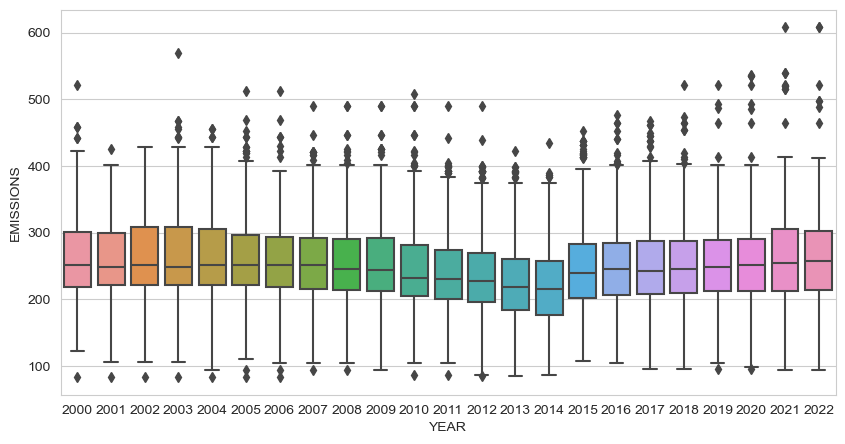

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x='YEAR',y='EMISSIONS',data=df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [5]:
df['YEAR']=pd.to_datetime(df['YEAR'],format='%Y')
df['CYLINDERS']=df['CYLINDERS'].astype('category')

In [6]:
df

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000-01-01,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000-01-01,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000-01-01,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000-01-01,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000-01-01,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022-01-01,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022-01-01,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022-01-01,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022-01-01,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


In [7]:
df.describe()

,ENGINE SIZE,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,3.356646,12.763513,8.919126,11.034341,27.374534,250.068452
std,1.335425,3.500999,2.274764,2.910920,7.376982,59.355276
min,0.800000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2.300000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,3.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,4.200000,14.725000,10.200000,12.700000,31.000000,288.000000
max,8.400000,30.600000,20.900000,26.100000,78.000000,608.000000


In [8]:
df.isnull().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [9]:
df1=df.copy()

In [10]:
cat_feat=df1.select_dtypes('object')

In [11]:
for i in df1.columns:
    print('-'*20)
    print(i,'-',len(df1[i].unique()))

--------------------
YEAR - 23
--------------------
MAKE - 87
--------------------
MODEL - 4242
--------------------
VEHICLE CLASS - 32
--------------------
ENGINE SIZE - 63
--------------------
CYLINDERS - 9
--------------------
TRANSMISSION - 30
--------------------
FUEL - 5
--------------------
FUEL CONSUMPTION - 228
--------------------
HWY (L/100 km) - 152
--------------------
COMB (L/100 km) - 192
--------------------
COMB (mpg) - 59
--------------------
EMISSIONS - 358


In [12]:
for i in cat_feat.columns:
    print('-'*20)
    print(i,'-',df1[i].unique())

--------------------
MAKE - ['ACURA' 'AUDI' 'BMW' 'BUICK' 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DAEWOO'
 'DODGE' 'FERRARI' 'FORD' 'GMC' 'HONDA' 'HYUNDAI' 'INFINITI' 'ISUZU'
 'JAGUAR' 'JEEP' 'KIA' 'LAND ROVER' 'LEXUS' 'LINCOLN' 'MAZDA'
 'MERCEDES-BENZ' 'NISSAN' 'OLDSMOBILE' 'PLYMOUTH' 'PONTIAC' 'PORSCHE'
 'SAAB' 'SATURN' 'SUBARU' 'SUZUKI' 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'BENTLEY'
 'ROLLS-ROYCE' 'MASERATI' 'MINI' 'MITSUBISHI' 'SMART' 'HUMMER'
 'ASTON MARTIN' 'LAMBORGHINI' 'BUGATTI' 'SCION' 'FIAT' 'RAM' 'SRT'
 'ALFA ROMEO' 'GENESIS' 'Acura' 'Alfa Romeo' 'Aston Martin' 'Audi'
 'Bentley' 'Bugatti' 'Buick' 'Cadillac' 'Chevrolet' 'Chrysler' 'Dodge'
 'Ford' 'Genesis' 'Honda' 'Hyundai' 'Infiniti' 'Jaguar' 'Jeep' 'Kia'
 'Lamborghini' 'Land Rover' 'Lexus' 'Lincoln' 'Maserati' 'Mazda'
 'Mercedes-Benz' 'Mitsubishi' 'Nissan' 'Porsche' 'Ram' 'Rolls-Royce'
 'Subaru' 'Toyota' 'Volkswagen' 'Volvo']
--------------------
MODEL - ['1.6EL' '3.2TL' '3.5RL' ... 'V90 CC B6 AWD' 'XC60 B5 AWD' 'XC60 B6 AWD']
--------

In [13]:
df1['MAKE']=df1['MAKE'].str.lower()

In [14]:
df1['VEHICLE CLASS']=df1['VEHICLE CLASS'].str.lower()

### Year

In [15]:
yergrp=pd.DataFrame(df1.groupby('YEAR').agg('mean'))

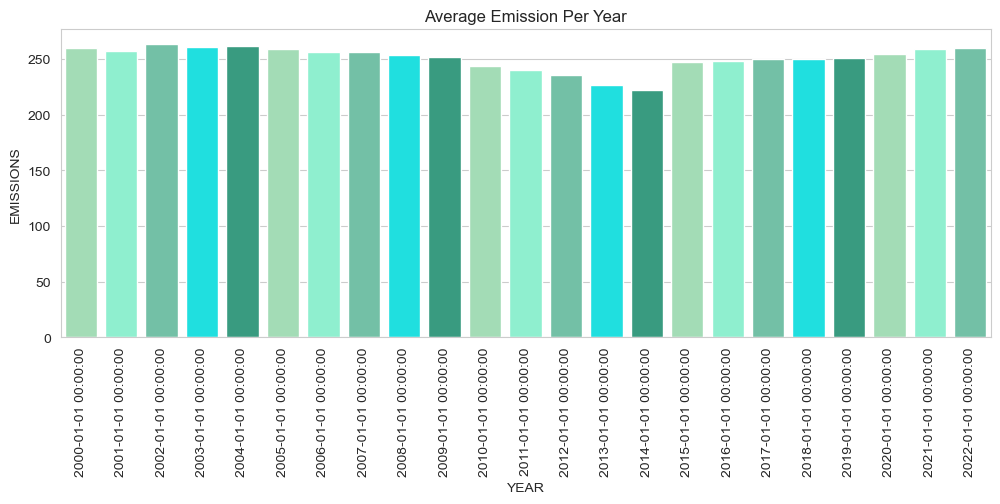

In [16]:
plt.figure(figsize=(12,4))
sns.barplot(y=yergrp['EMISSIONS'],x=yergrp.index,palette=custom_palette)
plt.title('Average Emission Per Year')
plt.tick_params(axis='x',labelrotation=90)
plt.show()

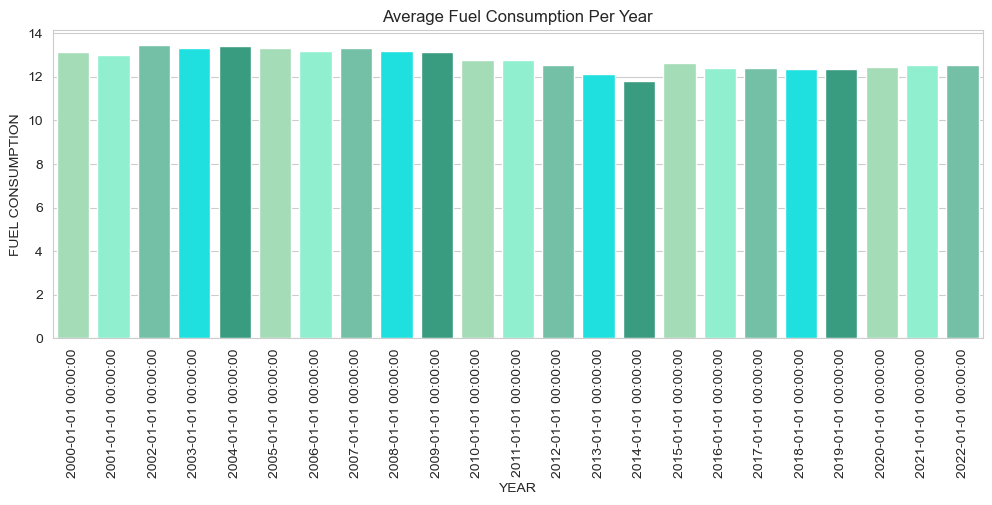

In [17]:
plt.figure(figsize=(12,4))
sns.barplot(y=yergrp['FUEL CONSUMPTION'],x=yergrp.index,palette=custom_palette)
plt.title('Average Fuel Consumption Per Year')
plt.tick_params(axis='x',labelrotation=90)
plt.show()

### MAKE

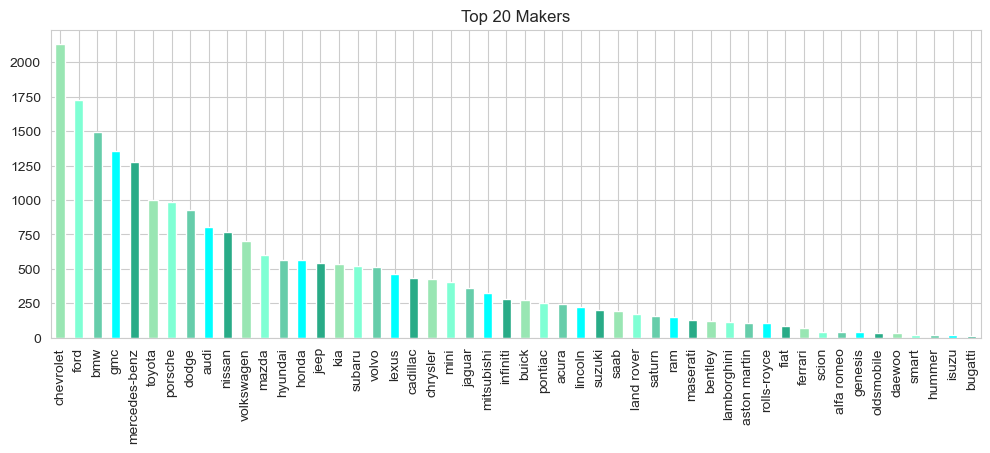

In [18]:
plt.figure(figsize=(12,4))
plt.title('Top 20 Makers')
df1['MAKE'].value_counts()[:50].plot(kind='bar',color=custom_palette)
plt.show()

In [19]:
makegrp=pd.DataFrame(df1.groupby('MAKE').agg('mean'))

In [20]:
makegrp2=pd.DataFrame(df1.groupby(['MAKE','VEHICLE CLASS']).count().reset_index())

In [21]:
makegrp2

,MAKE,VEHICLE CLASS,YEAR,MODEL,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,acura,compact,102,102,102,102,102,102,102,102,102,102,102
1,acura,mid-size,55,55,55,55,55,55,55,55,55,55,55
2,acura,subcompact,25,25,25,25,25,25,25,25,25,25,25
3,acura,suv,20,20,20,20,20,20,20,20,20,20,20
4,acura,suv - small,14,14,14,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,volvo,suv,55,55,55,55,55,55,55,55,55,55,55
435,volvo,suv - small,30,30,30,30,30,30,30,30,30,30,30
436,volvo,suv - standard,8,8,8,8,8,8,8,8,8,8,8
437,volvo,suv: small,18,18,18,18,18,18,18,18,18,18,18


<Axes: title={'center': 'Make,vehicle class-count'}, xlabel='MAKE', ylabel='VEHICLE CLASS'>

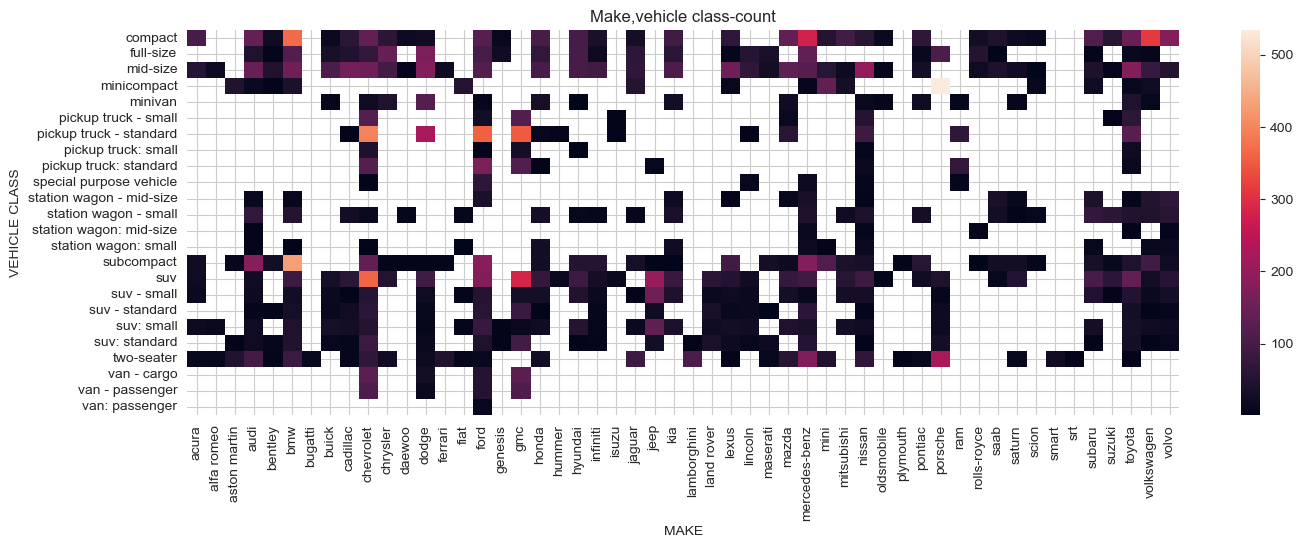

In [172]:
plt.figure(figsize=(16,5))
plt.title('Make,vehicle class-count')
sns.heatmap(makegrp2.pivot_table(columns='MAKE',index='VEHICLE CLASS',values="MODEL"))

<Axes: title={'center': 'Make,Cylinders-Emission'}, xlabel='CYLINDERS', ylabel='MAKE'>

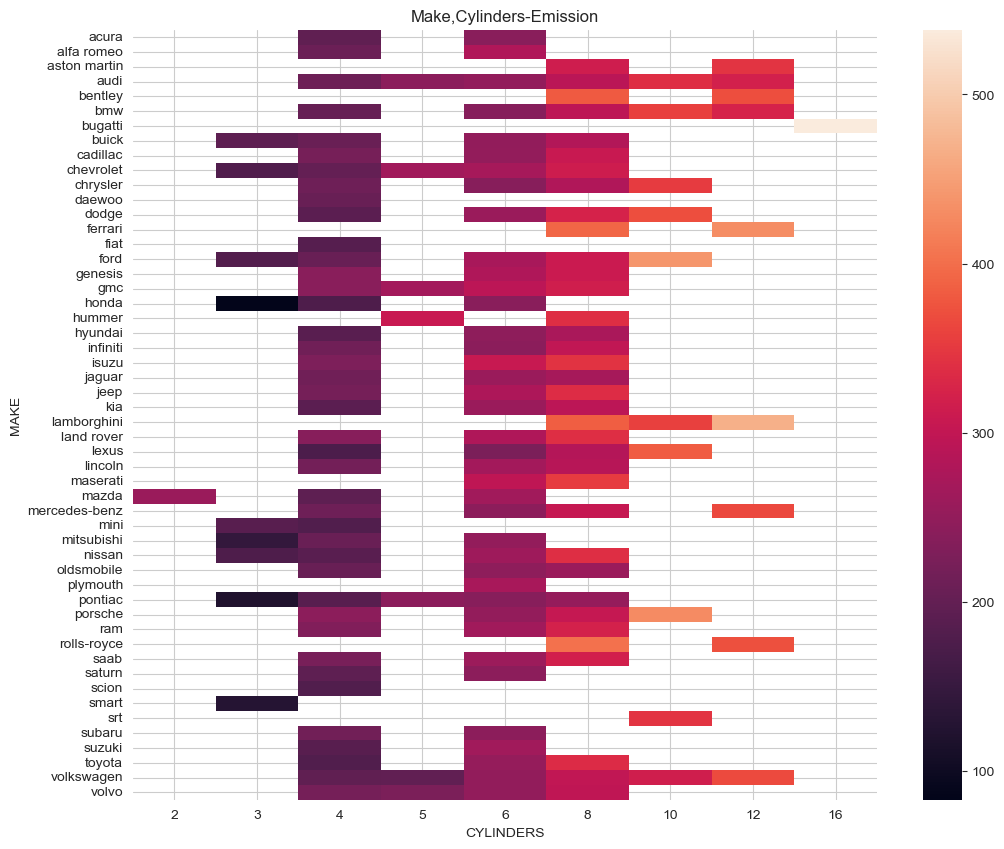

In [173]:
plt.figure(figsize=(12,10))
plt.title('Make,Cylinders-Emission')
sns.heatmap(df1.pivot_table(columns='CYLINDERS',index='MAKE',values='EMISSIONS'))

<Axes: title={'center': 'Make,Vehicle class-Emission'}, xlabel='VEHICLE CLASS', ylabel='MAKE'>

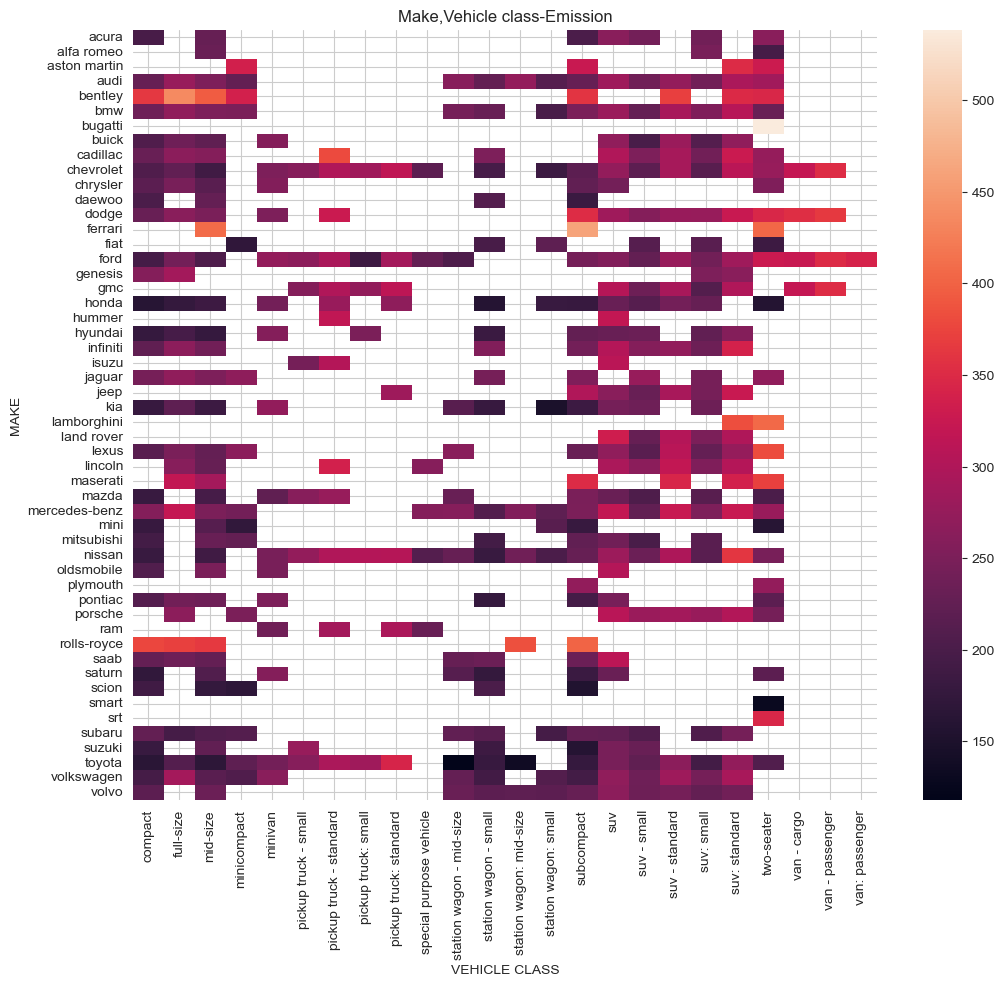

In [174]:
plt.figure(figsize=(12,10))
plt.title('Make,Vehicle class-Emission')
sns.heatmap(df1.pivot_table(columns='VEHICLE CLASS',index='MAKE',values='EMISSIONS'))

<Axes: title={'center': 'Make,Engine Size-Emissions'}, xlabel='ENGINE SIZE', ylabel='MAKE'>

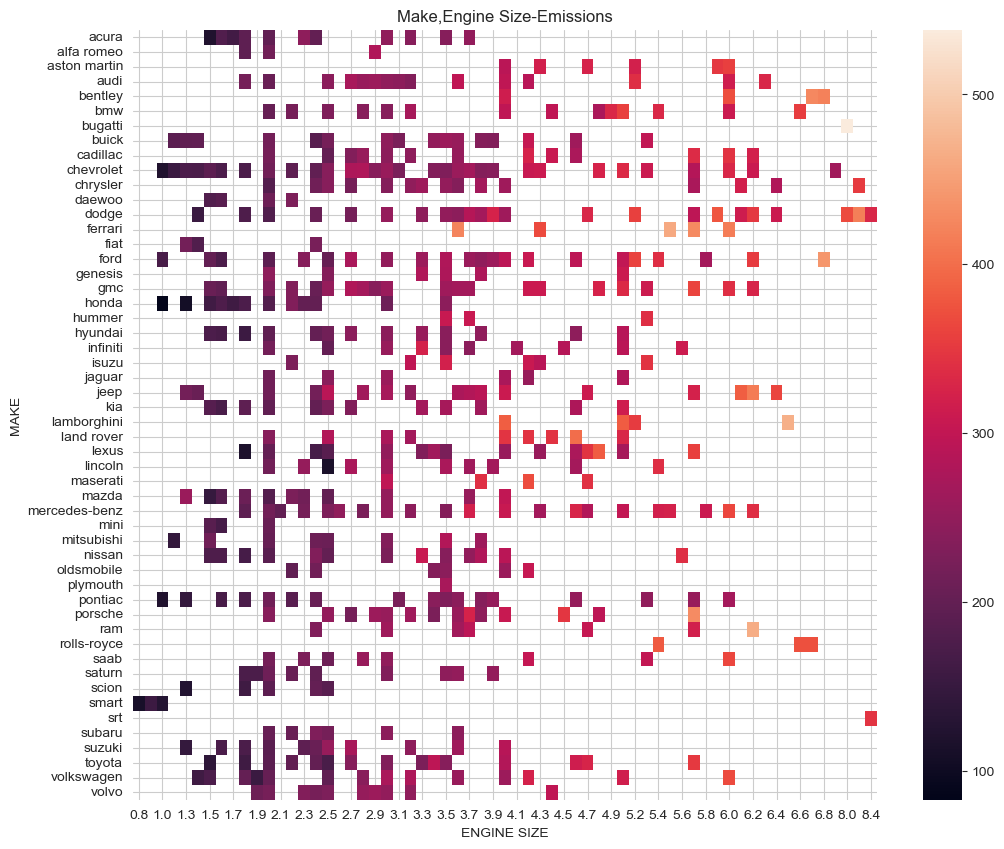

In [175]:
plt.figure(figsize=(12,10))
plt.title('Make,Engine Size-Emissions')
sns.heatmap(df1.pivot_table(columns='ENGINE SIZE',index='MAKE',values='EMISSIONS'))

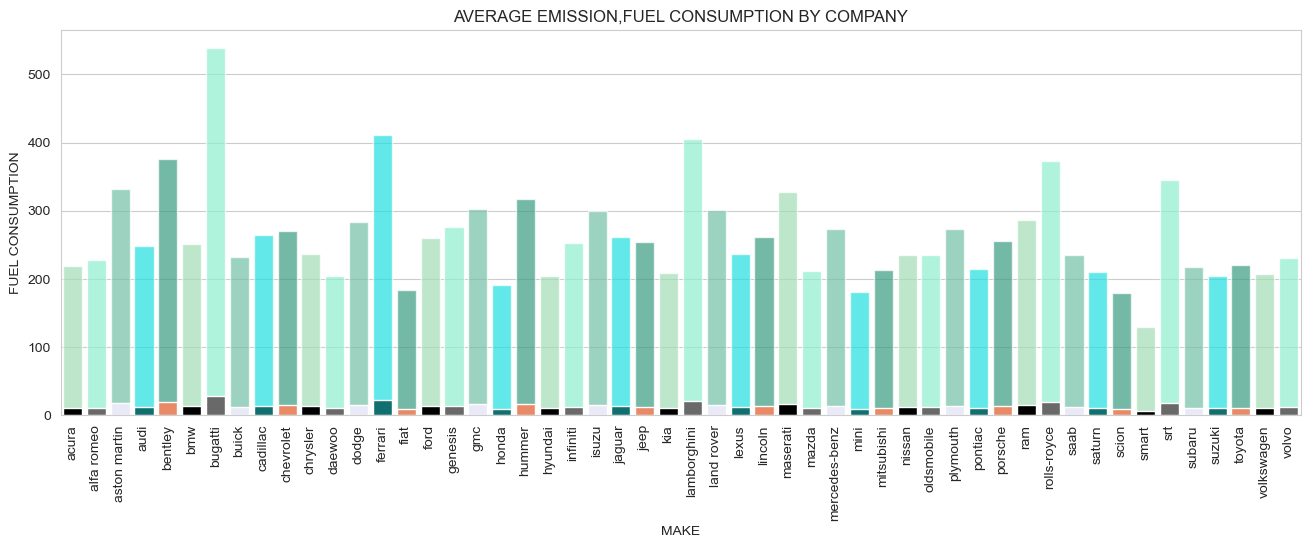

In [26]:
plt.figure(figsize=(16,5))
plt.title('AVERAGE EMISSION,FUEL CONSUMPTION BY COMPANY')
sns.barplot(x=makegrp.index,y='EMISSIONS',data=makegrp,palette=custom_palette,alpha=0.7)
sns.barplot(x=makegrp.index,y='FUEL CONSUMPTION',data=makegrp,palette=palette1)
plt.tick_params(axis='x',labelrotation=90)

### VEHICLE CLASS

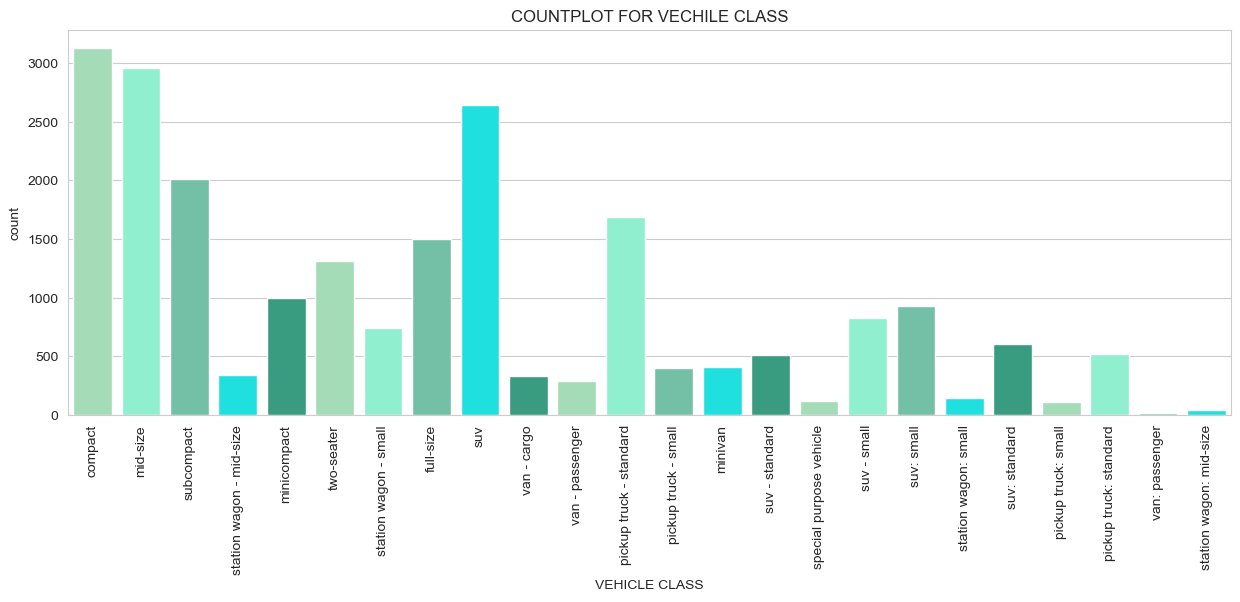

In [29]:
plt.figure(figsize=(15,5))
plt.title('COUNTPLOT FOR VECHILE CLASS')
sns.countplot(x='VEHICLE CLASS',data=df1,palette=custom_palette)
plt.tick_params(axis='x',labelrotation=90)
plt.show()

In [30]:
vechclssgrp=pd.DataFrame(df1.groupby('VEHICLE CLASS').agg('mean'))

In [31]:
vechclssgrp

,ENGINE SIZE,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
VEHICLE CLASS,,,,,,
compact,2.563799,10.656540,7.360058,9.174928,32.292933,211.539175
full-size,3.993347,13.581770,8.866001,11.464604,25.996008,259.609448
mid-size,3.076858,11.412297,7.713345,9.746824,30.775000,223.700676
minicompact,3.158048,11.904125,8.205734,10.237827,28.749497,236.807847
minivan,3.443137,13.379902,9.060539,11.440931,25.218137,250.333333
pickup truck - small,3.416129,13.026551,9.418362,11.404715,25.136476,261.736973
pickup truck - standard,4.569390,15.997513,11.351806,13.908171,20.878034,301.560687
pickup truck: small,3.062037,12.930556,9.876852,11.562963,24.666667,280.064815
pickup truck: standard,4.404272,15.082136,11.484660,13.465631,21.603883,303.145631


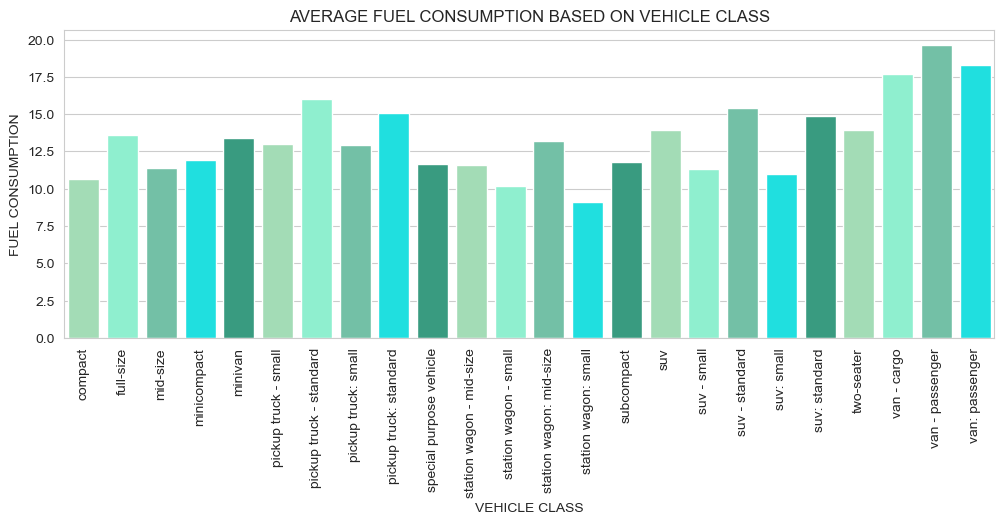

In [32]:
plt.figure(figsize=(12,4))
plt.title('AVERAGE FUEL CONSUMPTION BASED ON VEHICLE CLASS')
sns.barplot(x=vechclssgrp.index,y='FUEL CONSUMPTION',data=vechclssgrp,palette=custom_palette)
plt.tick_params(axis='x',labelrotation=90)
plt.show()

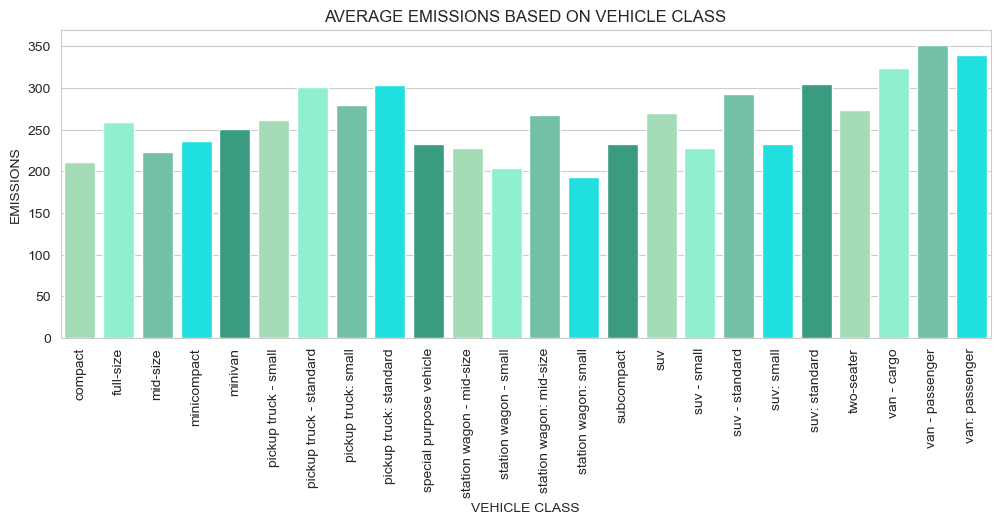

In [33]:
plt.figure(figsize=(12,4))
plt.title('AVERAGE EMISSIONS BASED ON VEHICLE CLASS')
sns.barplot(x=vechclssgrp.index,y='EMISSIONS',data=vechclssgrp,palette=custom_palette)
plt.tick_params(axis='x',labelrotation=90)
plt.show()

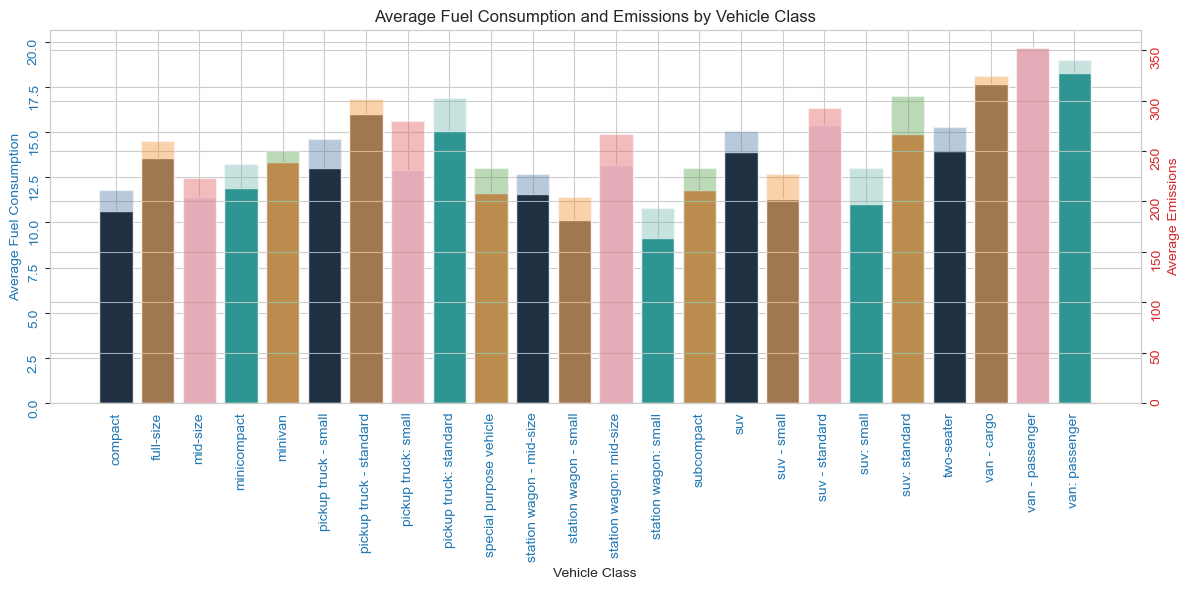

In [34]:
fig,ax1=plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Vehicle Class')
ax1.set_ylabel('Average Fuel Consumption', color=color)
ax1.bar(vechclssgrp.index,vechclssgrp['FUEL CONSUMPTION'], color=palette1, alpha=1, label='Fuel Consumption')
ax1.tick_params(axis='y', labelcolor=color,labelrotation=90)
ax1.tick_params(axis='x', labelcolor=color,labelrotation=90)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Emissions', color=color)
ax2.bar(vechclssgrp.index, vechclssgrp['EMISSIONS'], color=palette2, alpha=0.4, label='Emissions')
ax2.tick_params(axis='y', labelcolor=color,labelrotation=90)
plt.title('Average Fuel Consumption and Emissions by Vehicle Class')
fig.tight_layout()
plt.show()

### Fuel

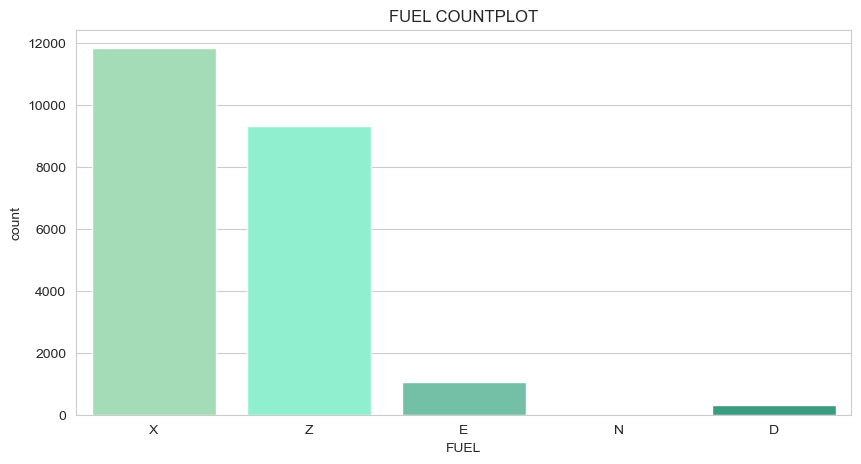

In [35]:
plt.figure(figsize=(10,5))
plt.title('FUEL COUNTPLOT')
sns.countplot(x='FUEL',data=df1,palette=custom_palette)
plt.show()

In [36]:
fuelgrp=pd.DataFrame(df1.groupby('FUEL').agg('mean'))

<Axes: title={'center': 'AVERAGE EMISSION BASED ON FUEL TYPE'}, xlabel='FUEL', ylabel='EMISSIONS'>

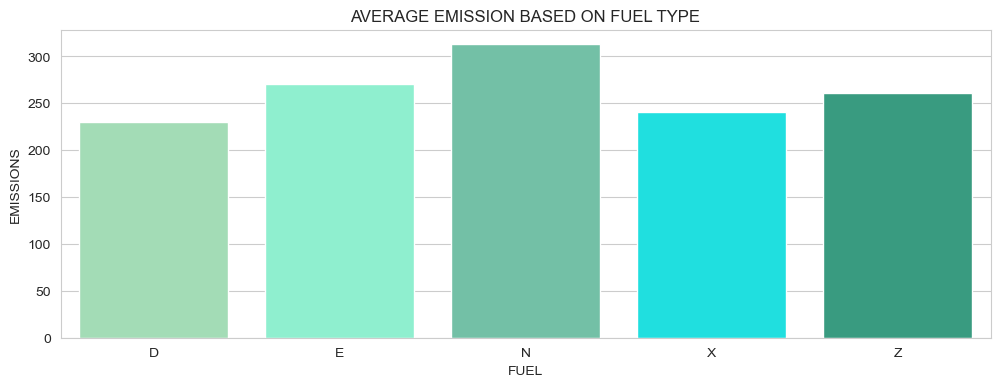

In [37]:
plt.figure(figsize=(12,4))
plt.title('AVERAGE EMISSION BASED ON FUEL TYPE')
sns.barplot(x=fuelgrp.index,y='EMISSIONS',data=fuelgrp,palette=custom_palette)


<Axes: title={'center': 'AVERAGE FUEL CONSUMPTION BASED ON FUEL TYPE'}, xlabel='FUEL', ylabel='FUEL CONSUMPTION'>

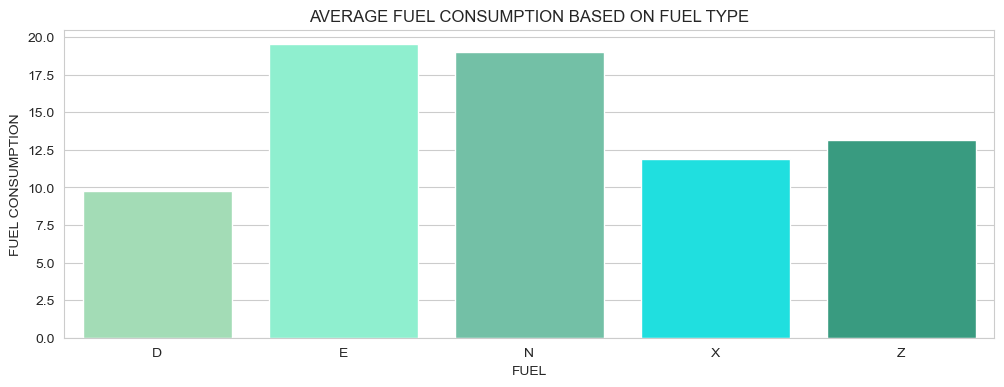

In [38]:
plt.figure(figsize=(12,4))
plt.title('AVERAGE FUEL CONSUMPTION BASED ON FUEL TYPE')
sns.barplot(x=fuelgrp.index,y='FUEL CONSUMPTION',data=fuelgrp,palette=custom_palette)

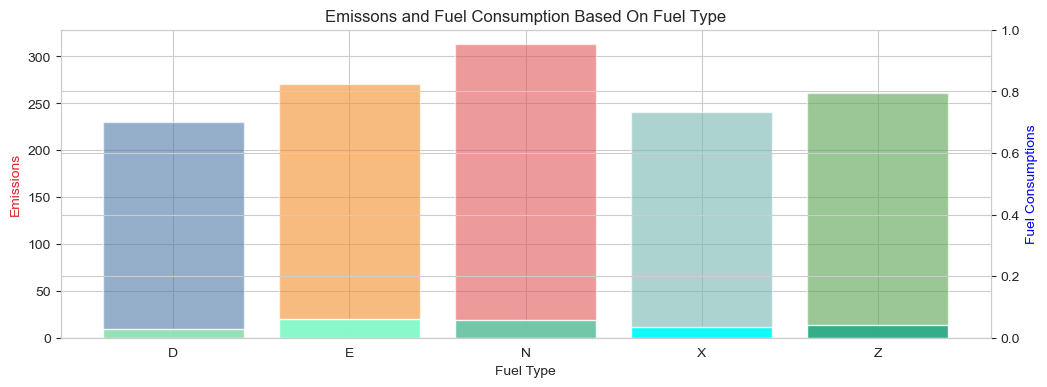

In [39]:
fig,ax1=plt.subplots(figsize=(12,4))
plt.title('Emissons and Fuel Consumption Based On Fuel Type')
ax1.bar(fuelgrp.index,fuelgrp['EMISSIONS'],color=palette2,alpha=0.6)
ax1.set_ylabel('Emissions', color=color)
ax1.set_xlabel('Fuel Type')

ax2=ax1.twinx()
ax1.bar(fuelgrp.index,fuelgrp['FUEL CONSUMPTION'],color=custom_palette,alpha=0.9)
ax2.set_ylabel('Fuel Consumptions',color='b')
plt.show()

### CYLINDERS 

<Axes: xlabel='CYLINDERS', ylabel='count'>

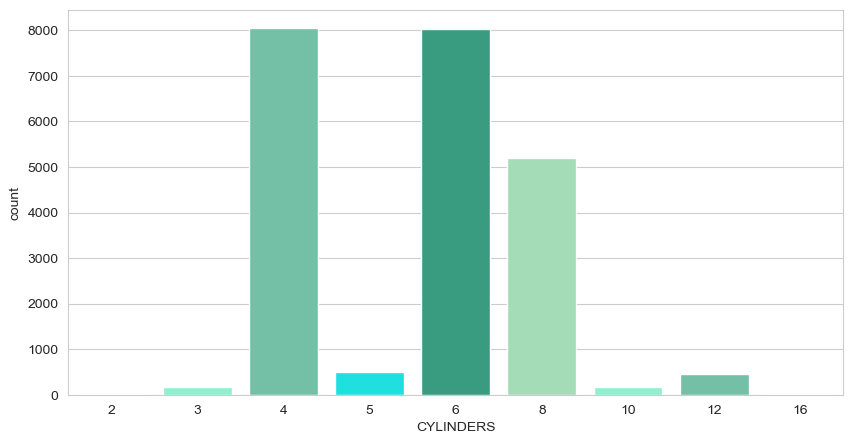

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='CYLINDERS',data=df1,palette=custom_palette)

In [42]:
cylgrp=pd.DataFrame(df1.groupby('CYLINDERS').agg('mean'))

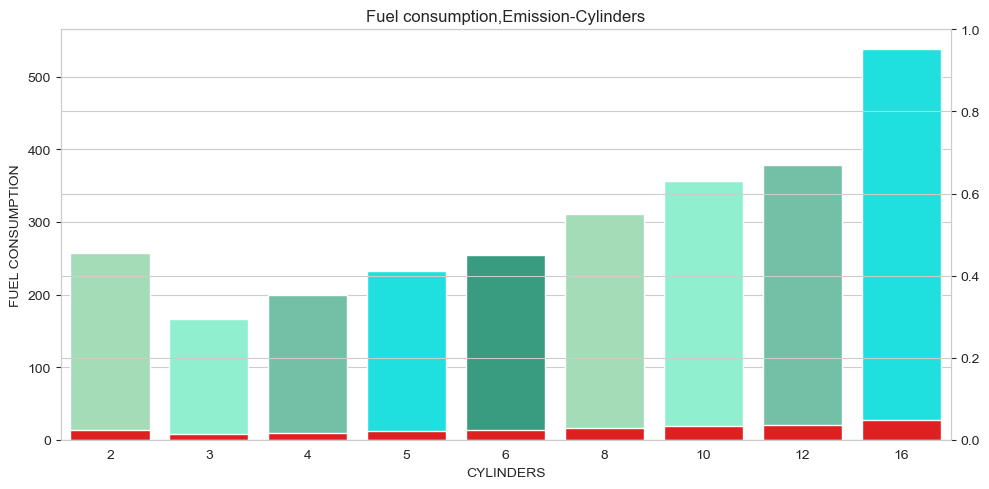

In [171]:
fig,ax1=plt.subplots(figsize=(10,5))
plt.title('Fuel consumption,Emission-Cylinders')
sns.barplot(x=cylgrp.index,y='EMISSIONS',data=cylgrp,ax=ax1,palette=custom_palette)
ax2=ax1.twinx()
sns.barplot(x=cylgrp.index,y='FUEL CONSUMPTION',data=cylgrp,ax=ax1,color='r')
plt.tight_layout()
plt.show()

### TRANSMISSION

In [44]:
transhrp=pd.DataFrame(df1.groupby('TRANSMISSION').agg('mean'))

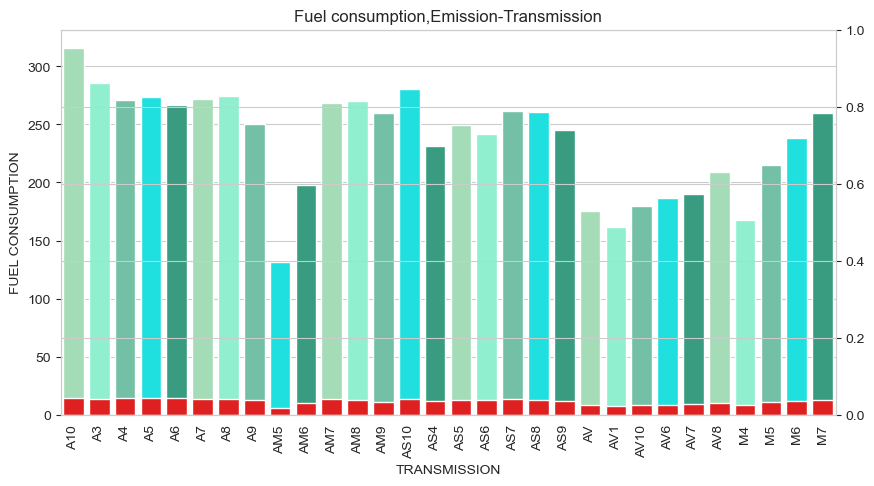

In [168]:
fig,ax1=plt.subplots(figsize=(10,5))
plt.title('Fuel consumption,Emission-Transmission')
sns.barplot(x=transhrp.index,y='EMISSIONS',data=transhrp,ax=ax1,palette=custom_palette)
ax1.tick_params(axis='x',labelrotation=90)
ax2=ax1.twinx()
sns.barplot(x=transhrp.index,y='FUEL CONSUMPTION',data=transhrp,ax=ax1,color='r')
plt.show()

### Feature Selection

In [46]:
df1.drop('YEAR',axis=1,inplace=True)

In [47]:
df1.corr()

,ENGINE SIZE,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
ENGINE SIZE,1.000000,0.821605,0.749394,0.807316,-0.755002,0.821285
FUEL CONSUMPTION,0.821605,1.000000,0.942351,0.992960,-0.921361,0.919101
HWY (L/100 km),0.749394,0.942351,1.000000,0.975014,-0.884744,0.894781
COMB (L/100 km),0.807316,0.992960,0.975014,1.000000,-0.920915,0.922983
COMB (mpg),-0.755002,-0.921361,-0.884744,-0.920915,1.000000,-0.901844
EMISSIONS,0.821285,0.919101,0.894781,0.922983,-0.901844,1.000000


In [48]:
new_df=df1.copy()

In [49]:
new_df.drop(['MAKE','MODEL','VEHICLE CLASS'],axis=1,inplace=True)

In [50]:
label=LabelEncoder()

In [51]:
new_df['TRANSMISSION']=label.fit_transform(new_df['TRANSMISSION'])

In [52]:
new_df['FUEL']=label.fit_transform(new_df['FUEL'])

In [53]:
new_df['CYLINDERS']=label.fit_transform(new_df['CYLINDERS'])

In [54]:
new_df.corr()

,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
ENGINE SIZE,1.000000,0.900813,-0.324956,-0.005149,0.821605,0.749394,0.807316,-0.755002,0.821285
CYLINDERS,0.900813,1.000000,-0.301515,0.076243,0.785576,0.691735,0.763047,-0.738927,0.791906
TRANSMISSION,-0.324956,-0.301515,1.000000,0.226152,-0.327587,-0.342998,-0.337355,0.324409,-0.302368
FUEL,-0.005149,0.076243,0.226152,1.000000,-0.126156,-0.195315,-0.152111,0.030066,0.065097
FUEL CONSUMPTION,0.821605,0.785576,-0.327587,-0.126156,1.000000,0.942351,0.992960,-0.921361,0.919101
HWY (L/100 km),0.749394,0.691735,-0.342998,-0.195315,0.942351,1.000000,0.975014,-0.884744,0.894781
COMB (L/100 km),0.807316,0.763047,-0.337355,-0.152111,0.992960,0.975014,1.000000,-0.920915,0.922983
COMB (mpg),-0.755002,-0.738927,0.324409,0.030066,-0.921361,-0.884744,-0.920915,1.000000,-0.901844
EMISSIONS,0.821285,0.791906,-0.302368,0.065097,0.919101,0.894781,0.922983,-0.901844,1.000000


<Axes: >

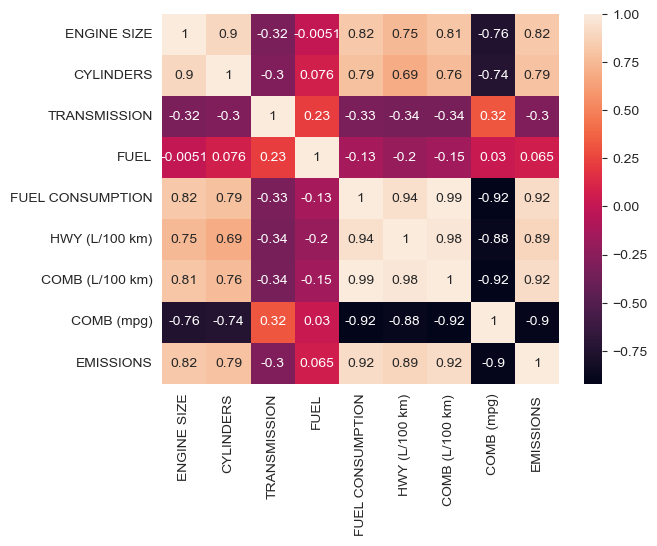

In [55]:
sns.heatmap(new_df.corr(),annot=True)

In [56]:
corr1=new_df.corrwith(new_df['EMISSIONS'])

<Axes: >

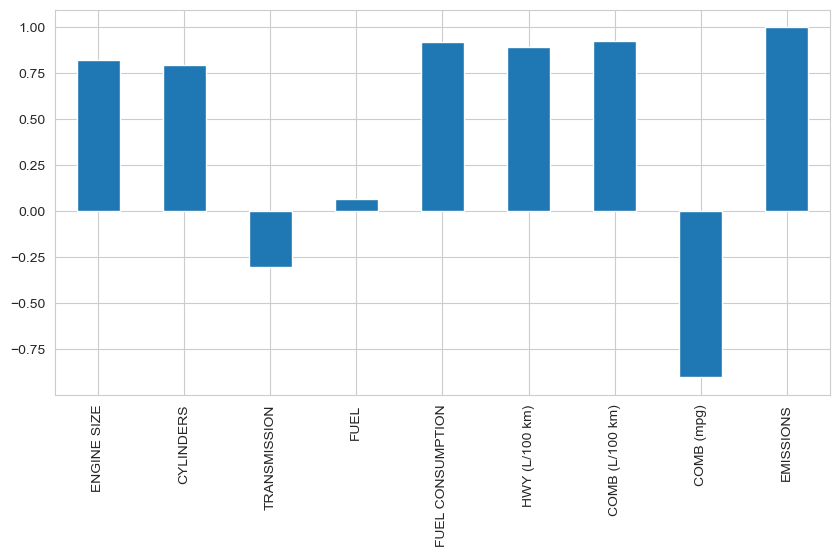

In [57]:
plt.figure(figsize=(10,5))
corr1.plot(kind='bar')

In [58]:
new_df.drop(['FUEL','TRANSMISSION'],axis=1,inplace=True)

<Axes: >

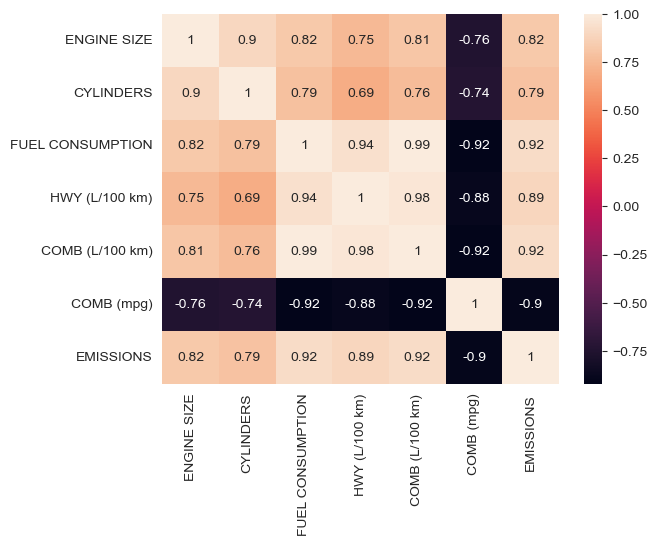

In [59]:
sns.heatmap(new_df.corr(),annot=True)

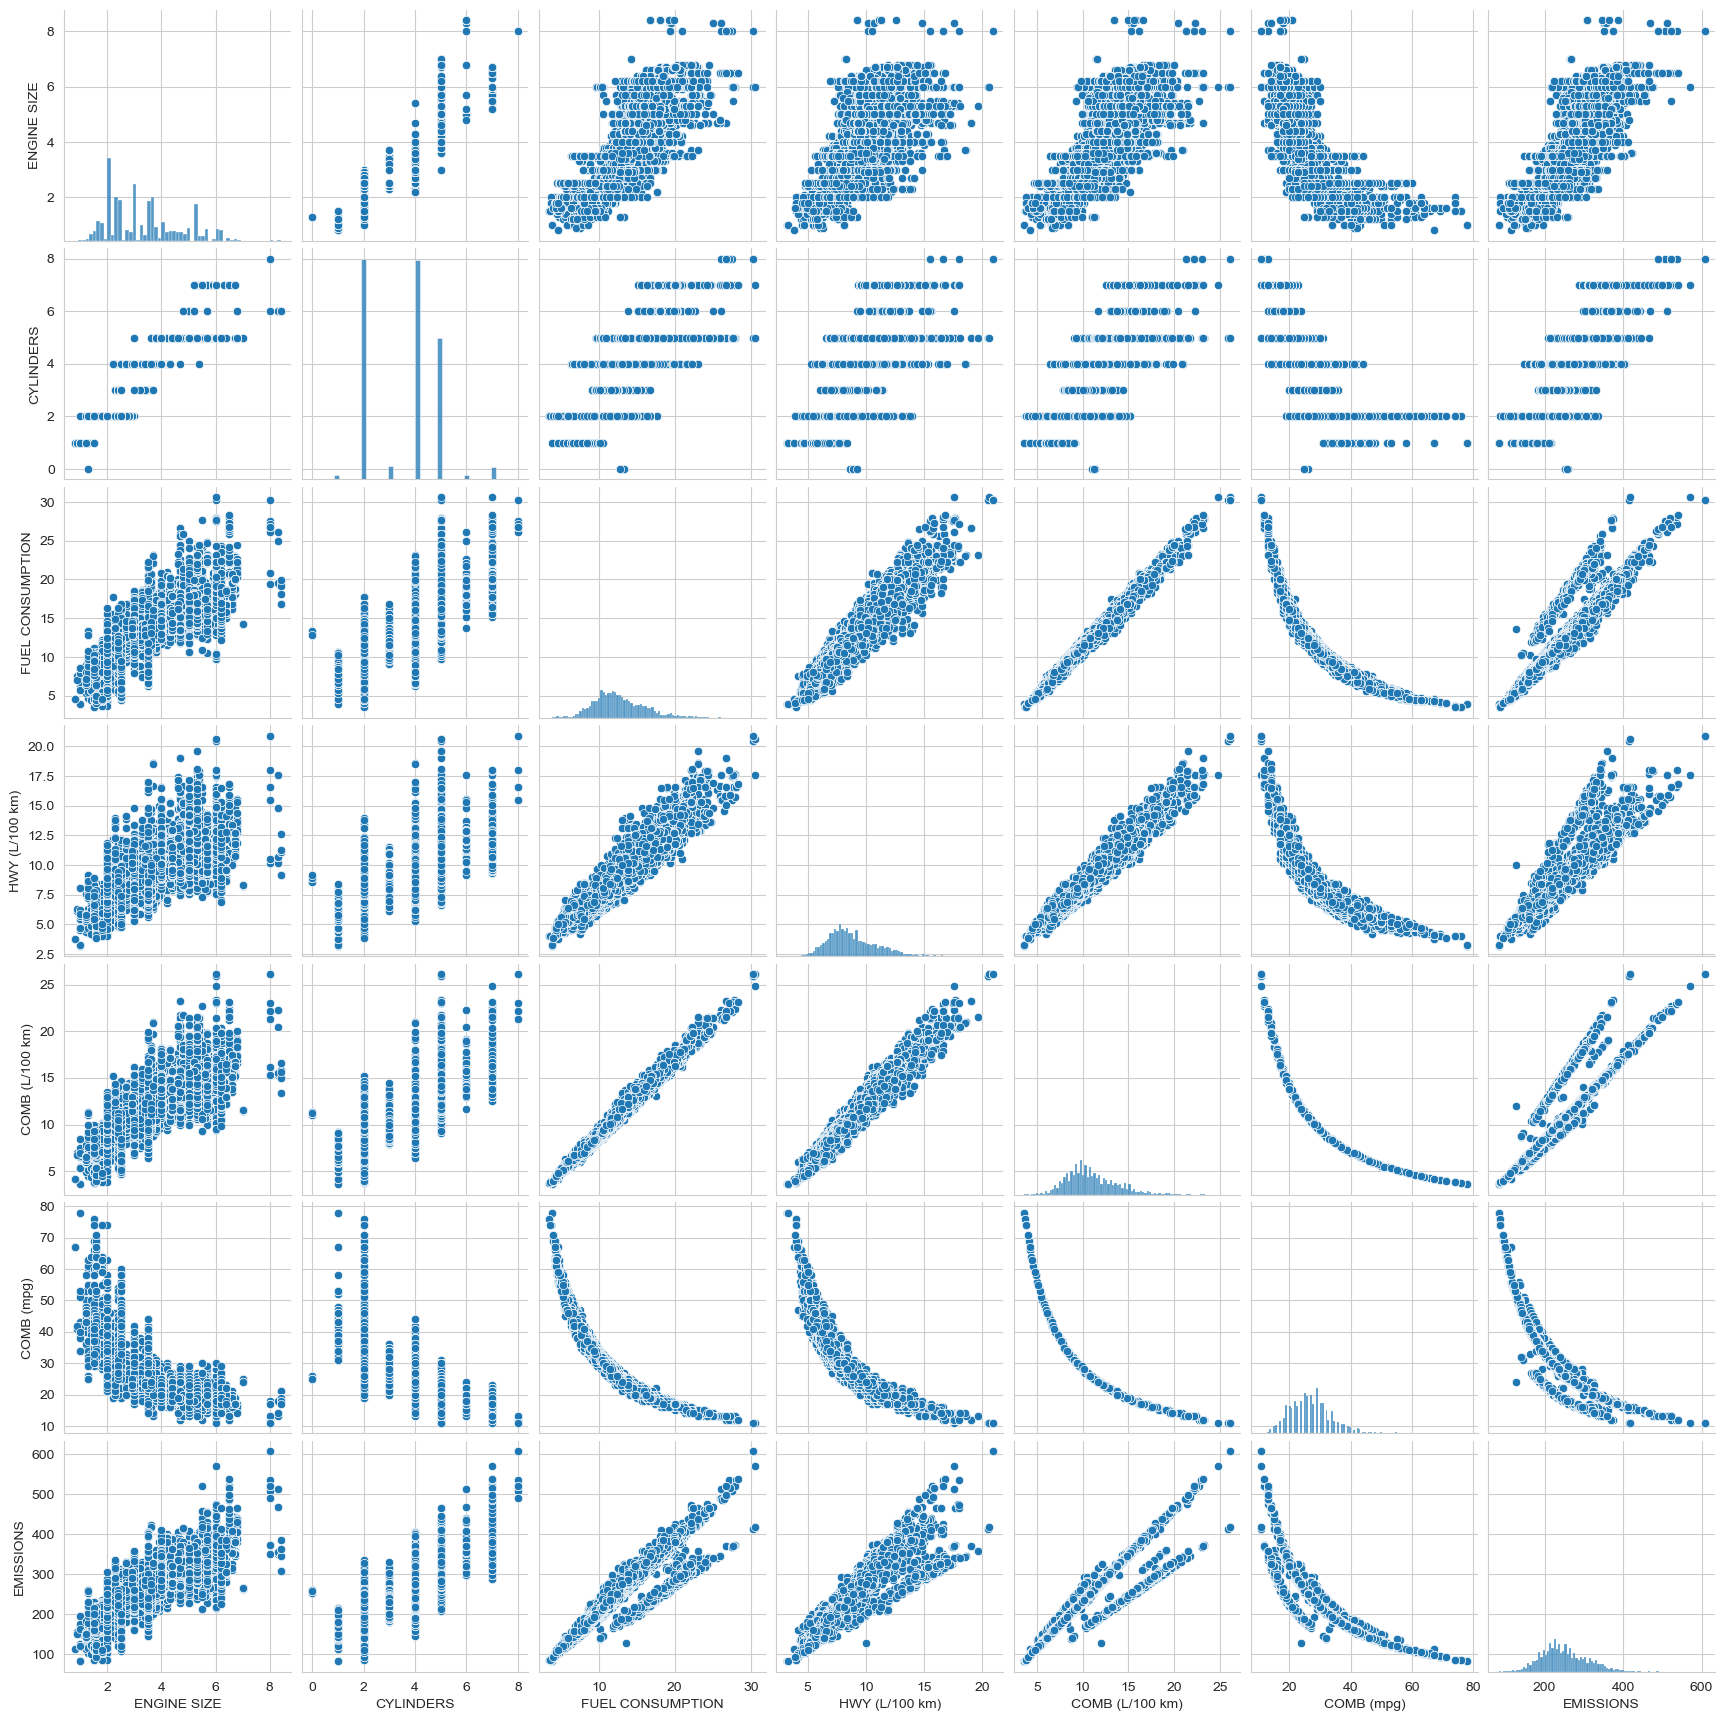

In [60]:
sns.pairplot(new_df)

In [61]:
corr1=new_df.corrwith(new_df['EMISSIONS'])

<Axes: >

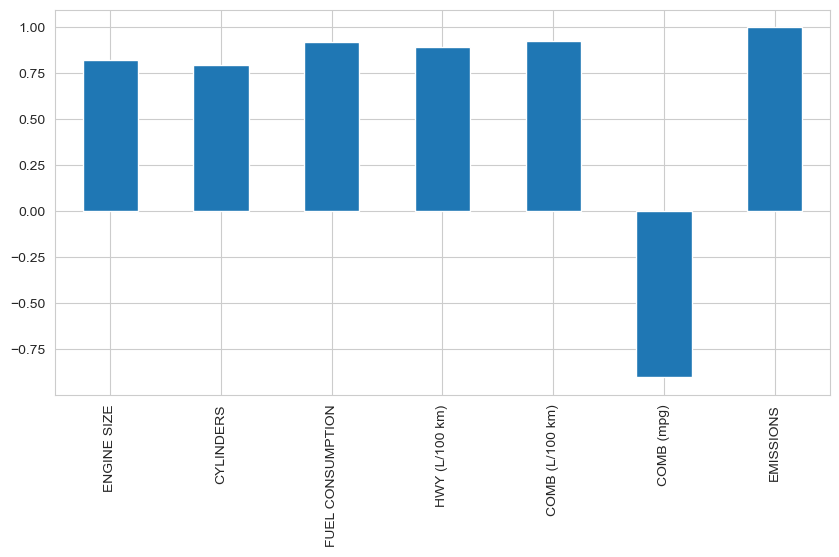

In [62]:
plt.figure(figsize=(10,5))
corr1.plot(kind='bar')

In [63]:
pps_matrix=pps.predictors(new_df,'EMISSIONS')

In [64]:
pps_matrix

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,COMB (L/100 km),EMISSIONS,0.830005,regression,True,mean absolute error,46.6154,7.924407,DecisionTreeRegressor()
1,COMB (mpg),EMISSIONS,0.815120,regression,True,mean absolute error,46.6154,8.618261,DecisionTreeRegressor()
2,FUEL CONSUMPTION,EMISSIONS,0.751569,regression,True,mean absolute error,46.6154,11.580719,DecisionTreeRegressor()
3,HWY (L/100 km),EMISSIONS,0.690904,regression,True,mean absolute error,46.6154,14.408643,DecisionTreeRegressor()
4,ENGINE SIZE,EMISSIONS,0.494198,regression,True,mean absolute error,46.6154,23.578182,DecisionTreeRegressor()
5,CYLINDERS,EMISSIONS,0.416388,regression,True,mean absolute error,46.6154,27.205286,DecisionTreeRegressor()


In [65]:
new_df.rename(columns={'ENGINE SIZE':'es','FUEL CONSUMPTION':'fc','CYLINDERS':'cyl','HWY (L/100 km)':'hwy','COMB (L/100 km)':'comb','EMISSIONS':'emi'},inplace=True)

In [66]:
new_df.rename(columns={'COMB (mpg)':'combm'},inplace=True)

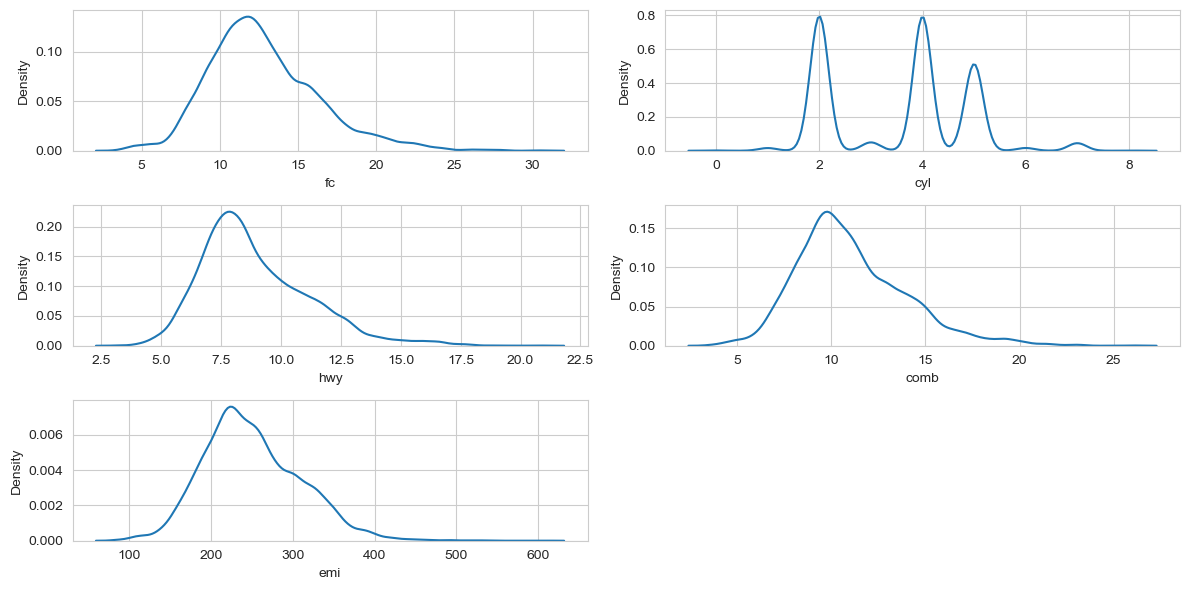

In [67]:
plt.figure(figsize=(12,6))
plt.subplot(321)
sns.kdeplot(new_df['fc'])
plt.subplot(322)
sns.kdeplot(new_df['cyl'])
plt.subplot(323)
sns.kdeplot(new_df['hwy'])
plt.subplot(324)
sns.kdeplot(new_df['comb'])
plt.subplot(325)
sns.kdeplot(new_df['emi'])
plt.tight_layout()
plt.show()

In [69]:
m1=smf.ols('emi~es+cyl+fc+hwy+comb+combm',data=new_df).fit()

In [70]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    emi   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 2.981e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        09:47:25   Log-Likelihood:                -99420.
No. Observations:               22556   AIC:                         1.989e+05
Df Residuals:                   22549   BIC:                         1.989e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    183.0463      2.546     71.897      0.000     178.056     188.037
es             6.0661      0.253     23.932      0.000       5.569       6.563
cyl            5.1516      0.240     21.431      0.000       4.680       5.623
fc            -5.8388      1.623     -3.598      0.000      -9.020      -2.658
hwy            0.7326      1.332      0.550      0.582      -1.878       3.344
comb          15.1543      2.942      5.151      0.000       9.388      20.920
combm         -2.5878      0.047    -55.117      0.000      -2.680      -2.496
==============================================================================
Omnibus:                     6419.893   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41313.919
Skew:                          -1.212   Prob(JB):                         0.00
Kurtosis:                       9.171   Cond. No.                         925.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
es_r=smf.ols('es~cyl+fc+hwy+comb+combm',data=new_df).fit().rsquared
vif_es=1/(1-es_r)

cyl_r=smf.ols('cyl~es+fc+hwy+comb+combm',data=new_df).fit().rsquared
vif_cyl=1/(1-cyl_r)

fc_r=smf.ols('fc~cyl+es+hwy+comb+combm',data=new_df).fit().rsquared
vif_fc=1/(1-fc_r)

hwy_r=smf.ols('hwy~fc+cyl+es+comb+combm',data=new_df).fit().rsquared
vif_hwy=1/(1-hwy_r)

comb_r=smf.ols('comb~fc+cyl+es+hwy+combm',data=new_df).fit().rsquared
vif_comb=1/(1-comb_r)

combm_r=smf.ols('combm~fc+cyl+es+hwy+comb',data=new_df).fit().rsquared
vif_combm=1/(1-combm_r)


In [72]:
vif_={'features':['es','cyl','fc','hwy','comb','combm'],'vif':[vif_es,vif_cyl,vif_fc,vif_hwy,vif_comb,vif_combm]}
vif_df=pd.DataFrame(vif_)
vif_df

,features,vif
0,es,6.549511
1,cyl,5.832719
2,fc,1845.503377
3,hwy,524.887854
4,comb,4191.499685
5,combm,6.857076


In [73]:
m2=smf.ols('emi~es+cyl+hwy+comb+combm',data=new_df).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    emi   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                 3.574e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        09:47:45   Log-Likelihood:                -99427.
No. Observations:               22556   AIC:                         1.989e+05
Df Residuals:                   22550   BIC:                         1.989e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    183.0710      2.547     71.888      0.000     178.079     188.063
es             6.0820      0.254     23.992      0.000       5.585       6.579
cyl            5.1159      0.240     21.295      0.000       4.645       5.587
hwy            5.4158      0.283     19.142      0.000       4.861       5.970
comb           4.6195      0.281     16.441      0.000       4.069       5.170
combm         -2.5878      0.047    -55.103      0.000      -2.680      -2.496
==============================================================================
Omnibus:                     6437.463   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41306.408
Skew:                          -1.216   Prob(JB):                         0.00
Kurtosis:                       9.167   Cond. No.                         610.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF

In [74]:
es_r=smf.ols('es~cyl+hwy+comb+combm',data=new_df).fit().rsquared
vif_es=1/(1-es_r)

cyl_r=smf.ols('cyl~es+hwy+comb+combm',data=new_df).fit().rsquared
vif_cyl=1/(1-cyl_r)

hwy_r=smf.ols('hwy~cyl+es+comb+combm',data=new_df).fit().rsquared
vif_hwy=1/(1-hwy_r)

comb_r=smf.ols('comb~cyl+es+hwy+combm',data=new_df).fit().rsquared
vif_comb=1/(1-comb_r)

combm_r=smf.ols('combm~cyl+es+hwy+comb',data=new_df).fit().rsquared
vif_combm=1/(1-combm_r)

In [75]:
vif_={'features':['es','cyl','hwy','comb','combm'],'vif':[vif_es,vif_cyl,vif_hwy,vif_comb,vif_combm]}
vif_df=pd.DataFrame(vif_)
vif_df

,features,vif
0,es,6.547523
1,cyl,5.822799
2,hwy,23.664488
3,comb,38.216601
4,combm,6.857076


In [76]:
m3=smf.ols('emi~es+cyl+hwy+combm',data=new_df).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    emi   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                 4.409e+04
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        09:47:50   Log-Likelihood:                -99561.
No. Observations:               22556   AIC:                         1.991e+05
Df Residuals:                   22551   BIC:                         1.992e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    202.1717      2.280     88.684      0.000     197.703     206.640
es             6.8401      0.251     27.278      0.000       6.349       7.332
cyl            5.7900      0.238     24.315      0.000       5.323       6.257
hwy            9.5408      0.132     72.523      0.000       9.283       9.799
combm         -2.9478      0.042    -70.529      0.000      -3.030      -2.866
==============================================================================
Omnibus:                     4863.199   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37315.957
Skew:                          -0.830   Prob(JB):                         0.00
Kurtosis:                       9.078   Cond. No.                         512.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
es_r=smf.ols('es~cyl+hwy+combm',data=new_df).fit().rsquared
vif_es=1/(1-es_r)

cyl_r=smf.ols('cyl~es+hwy+combm',data=new_df).fit().rsquared
vif_cyl=1/(1-cyl_r)

hwy_r=smf.ols('hwy~cyl+es+combm',data=new_df).fit().rsquared
vif_hwy=1/(1-hwy_r)

combm_r=smf.ols('combm~cyl+es+hwy',data=new_df).fit().rsquared
vif_combm=1/(1-combm_r)

In [78]:
vif_={'features':['es','cyl','hwy','combm'],'vif':[vif_es,vif_cyl,vif_hwy,vif_combm]}
vif_df=pd.DataFrame(vif_)
vif_df

,features,vif
0,es,6.330902
1,cyl,5.653208
2,hwy,5.055923
3,combm,5.366769


In [92]:
new_df2=df1.copy()

In [95]:
new_df2['MAKE']=label.fit_transform(new_df2['MAKE'])
new_df2['MODEL']=label.fit_transform(new_df2['MODEL'])
new_df2['VEHICLE CLASS']=label.fit_transform(new_df2['VEHICLE CLASS'])
new_df2['CYLINDERS']=label.fit_transform(new_df2['CYLINDERS'])
new_df2['FUEL']=label.fit_transform(new_df2['FUEL'])

In [97]:
new_df2['TRANSMISSION']=label.fit_transform(new_df2['TRANSMISSION'])

In [98]:
new_df2

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,0,1,0,1.6,2,2,3,9.2,6.7,8.1,35,186
1,0,1,0,1.6,2,27,3,8.5,6.5,7.6,37,175
2,0,61,2,3.2,4,15,4,12.2,7.4,10.0,28,230
3,0,62,2,3.5,4,2,4,13.4,9.2,11.5,25,264
4,0,2173,14,1.8,2,2,3,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...
22551,51,4061,18,2.0,2,18,4,10.7,7.7,9.4,30,219
22552,51,4067,18,2.0,2,18,4,10.5,8.1,9.4,30,219
22553,51,4068,18,2.0,2,18,4,11.0,8.7,9.9,29,232
22554,51,4088,19,2.0,2,18,4,11.5,8.4,10.1,28,236


In [80]:
features=new_df[['es','cyl','hwy','combm']]
target=new_df['emi']

In [100]:
feature1=new_df2.drop('EMISSIONS',axis=1)
target1=new_df2['EMISSIONS']

In [101]:
def tuning(model,params,x,y):
    '''model,params'''
    grid=GridSearchCV(model,params,n_jobs=-1)
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=100)
    grid.fit(x_train,y_train)
    bestp=grid.best_params_
    return bestp

### Decision Tree For Feature Selection

In [155]:
x_train,x_test,y_train,y_test=train_test_split(feature1,target1,train_size=0.8,random_state=100)

In [103]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5, 10],
     
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50]
}

In [104]:
tuning(DecisionTreeRegressor(),param_grid,x_train,y_train)

{'max_depth': 40,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [105]:
dtree=DecisionTreeRegressor(max_depth=40,max_features=None,max_leaf_nodes=None,min_samples_leaf=1,min_samples_split=2).fit(x_train,y_train)

In [106]:
dtree.feature_importances_,dtree.feature_names_in_

(array([1.54280846e-04, 2.35159707e-04, 2.11181153e-04, 1.53840969e-04,
        5.63447826e-05, 6.91282875e-04, 5.83276734e-02, 1.63436231e-04,
        6.80805915e-04, 9.13923930e-01, 2.54020642e-02]),
 array(['MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
        'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
        'COMB (L/100 km)', 'COMB (mpg)'], dtype=object))

In [107]:
impfeat=pd.DataFrame(dtree.feature_importances_,dtree.feature_names_in_)

In [108]:
impfeat.sort_values(0)

,0
CYLINDERS,0.000056
ENGINE SIZE,0.000154
MAKE,0.000154
FUEL CONSUMPTION,0.000163
VEHICLE CLASS,0.000211
MODEL,0.000235
HWY (L/100 km),0.000681
TRANSMISSION,0.000691
COMB (mpg),0.025402
FUEL,0.058328


In [112]:
finalfeature=new_df2[['COMB (L/100 km)','FUEL','COMB (mpg)','TRANSMISSION','HWY (L/100 km)']]

### XGBOOST For Feature Selection

In [156]:
xg=XGBRegressor().fit(x_train,y_train)

In [157]:
xg.feature_names_in_,xg.feature_importances_

(array(['MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
        'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
        'COMB (L/100 km)', 'COMB (mpg)'], dtype='<U16'),
 array([9.29533853e-05, 1.07765329e-04, 4.38369258e-04, 2.04033844e-04,
        1.82240663e-04, 3.92903283e-04, 1.13050580e-01, 4.03530151e-03,
        1.08739305e-02, 5.71412981e-01, 2.99208939e-01], dtype=float32))

In [162]:
impfeat2=pd.DataFrame(xg.feature_importances_,xg.feature_names_in_)
impfeat2.sort_values(by=0)

,0
MAKE,0.000093
MODEL,0.000108
CYLINDERS,0.000182
ENGINE SIZE,0.000204
TRANSMISSION,0.000393
VEHICLE CLASS,0.000438
FUEL CONSUMPTION,0.004035
HWY (L/100 km),0.010874
FUEL,0.113051
COMB (mpg),0.299209


## Model Building 

In [109]:
index_columns = ['mae_train','rsquare_train','mae_test','rsquare_test']
result=pd.DataFrame(index=index_columns)

In [110]:
def reg_model(model,model_name,x,y):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.80,random_state=100)
    
    model_1=model.fit(xtrain,ytrain)
    train_predt=model_1.predict(xtrain)
    rsquare_train=r2_score(ytrain,train_predt)
    mae_train=mean_absolute_error(ytrain,train_predt)
    
    test_predt=model_1.predict(xtest)
    rsquare_test=r2_score(ytest,test_predt)
    mae_test=mean_absolute_error(ytest,test_predt)
    
    result[model_name]=mae_train,rsquare_train,mae_test,rsquare_test
    

### Linear Regression

In [111]:
reg_model(LinearRegression(),'Linear Regression',features,target)

In [92]:
#tuning(DecisionTreeRegressor(),param_grid,features2,target2)

### Decision Tree

In [114]:
reg_model(DecisionTreeRegressor(max_depth=20,max_features=None,max_leaf_nodes=None,min_samples_leaf=1,min_samples_split=2),'DecisionTree',finalfeature,target1)

In [115]:
result

,Linear Regression,DecisionTree
mae_train,12.065017,0.263105
rsquare_train,0.886799,0.999805
mae_test,11.998992,0.737241
rsquare_test,0.885875,0.998042


### Random Forest

In [117]:
param_grid2 = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [118]:
#tuning(RandomForestRegressor(),param_grid2,finalfeature,target1)

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [119]:
reg_model(RandomForestRegressor(max_depth=None,max_features='log2',min_samples_leaf=1,min_samples_split=2,n_estimators=500),'RandomForest',finalfeature,target1)

### XGBOOST 

In [120]:
param_grid3 = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

In [122]:
#tuning(XGBRegressor(),param_grid3,finalfeature,target1)

{'colsample_bytree': 1.0,
 'gamma': 0.2,
 'learning_rate': 0.2,
 'max_depth': 7,
 'min_child_weight': 1,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'subsample': 0.8}

In [124]:
reg_model(XGBRegressor(colsample_bytree= 1.0,gamma= 0.2,learning_rate=0.2,max_depth= 7,min_child_weight= 1,reg_alpha= 0,reg_lambda= 1,subsample= 0.8),'XGBoost',finalfeature,target1)

<Axes: >

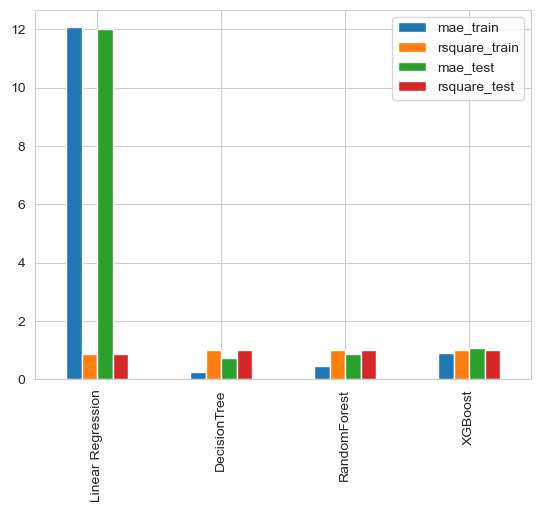

In [133]:
result.transpose().plot(kind='bar')

In [167]:
result.transpose()

,mae_train,rsquare_train,mae_test,rsquare_test
Linear Regression,12.065017,0.886799,11.998992,0.885875
DecisionTree,0.263105,0.999805,0.737241,0.998042
RandomForest,0.447874,0.999635,0.884708,0.998365
XGBoost,0.892648,0.999450,1.066911,0.998885
